# Generate test data

Last updated: 2019-10-22

Create some data to test our propensity score matching algorithms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Generate fake data

In [2]:
N_POS = 250000
N_NEG = 750000

In [3]:
neg_scores = np.random.beta(2, 5, N_NEG)

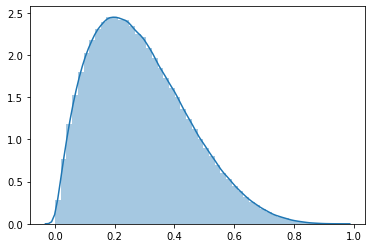

In [4]:
sns.distplot(neg_scores);

In [5]:
pos_scores = np.random.beta(3, 3.5, N_POS)

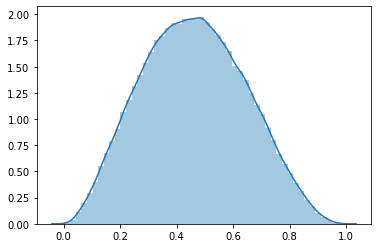

In [6]:
sns.distplot(pos_scores);

---

## Create tables

In [7]:
pos_people = (pd
    .Series(pos_scores)
    .to_frame("pred_prob")
    .assign(used_drug = 1)
    .reset_index()
    .assign(MMI_ID = lambda df: df["index"].map(lambda v: "pos_{}".format(v)))
    .drop("index", axis=1)
)

In [8]:
pos_people.shape

(250000, 3)

In [9]:
pos_people.head()

,pred_prob,used_drug,MMI_ID
0,0.746445,1,pos_0
1,0.401794,1,pos_1
2,0.207886,1,pos_2
3,0.551139,1,pos_3
4,0.522224,1,pos_4


In [10]:
neg_people = (pd
    .Series(neg_scores)
    .to_frame("pred_prob")
    .assign(used_drug = 0)
    .reset_index()
    .assign(MMI_ID = lambda df: df["index"].map(lambda v: "neg_{}".format(v)))
    .drop("index", axis=1)
)

In [11]:
neg_people.shape

(750000, 3)

In [12]:
neg_people.head()

,pred_prob,used_drug,MMI_ID
0,0.237867,0,neg_0
1,0.311378,0,neg_1
2,0.309294,0,neg_2
3,0.357804,0,neg_3
4,0.137277,0,neg_4


In [13]:
data = pos_people.append(neg_people).reset_index(drop=True)

In [14]:
data.shape

(1000000, 3)

In [15]:
data.head()

,pred_prob,used_drug,MMI_ID
0,0.746445,1,pos_0
1,0.401794,1,pos_1
2,0.207886,1,pos_2
3,0.551139,1,pos_3
4,0.522224,1,pos_4


## Reset values for C++

In [16]:
c_data = (data
    .reset_index()
    .drop("MMI_ID", axis=1)
    .rename(columns={"index": "MMI_ID"})
)

In [17]:
c_data.shape

(1000000, 3)

In [18]:
c_data.head()

,MMI_ID,pred_prob,used_drug
0,0,0.746445,1
1,1,0.401794,1
2,2,0.207886,1
3,3,0.551139,1
4,4,0.522224,1


In [19]:
c_data.dtypes

MMI_ID         int64
pred_prob    float64
used_drug      int64
dtype: object

In [20]:
c_data["used_drug"].value_counts()

0    750000
1    250000
Name: used_drug, dtype: int64

In [21]:
c_data["MMI_ID"].nunique()

1000000

## Save data to disk

In [22]:
c_data.to_csv("../data/scores.tsv", sep='\t', index=False, header=False)